<div dir=rtl align=center>
<font face="B Yekan">
<font color=orange size=6.5>
<br>

<br>
<font color=orange size=5>
Politecnico di Milano and Università degli Studi di Milano<br>
<font color=orange size=5>
<br>
<font size=4>

In [1]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno
import re

# Preprocessing and imputation
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTENC

# Model selection and validation tools
from sklearn.model_selection import (train_test_split, KFold, StratifiedKFold,
                                     GridSearchCV, RandomizedSearchCV, cross_val_score,
                                     validation_curve, ParameterGrid)

# Machine Learning Models
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, accuracy_score,classification_report

# Advanced Modeling and Optimization
from scipy import stats
from scipy.stats import wasserstein_distance, randint, uniform
from bayes_opt import BayesianOptimization
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split


from sklearn.exceptions import ConvergenceWarning  # Import the specific warning
import warnings

# Suppress convergence and other runtime warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Read the initial dataset
data = pd.read_csv('/Users/Sam/Desktop/Titanic/titanic.csv')

# Correct column names
correct_columns = ['id','pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest']

# Load the dataset with the correct column names
data = pd.read_csv('titanic.csv', names=correct_columns, header=0)

# replace '?' with NaN
data = data.replace('?', np.nan)
data.head(100)

,id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,1,"Allen,Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis,MO"
1,2,1,1,"Allison,Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,NaN,"Montreal,PQ / Chesterville,ON"
2,3,1,0,"Allison,Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal,PQ / Chesterville,ON"
3,4,1,0,"Allison,Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,NaN,135,"Montreal,PQ / Chesterville,ON"
4,5,1,0,"Allison,Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal,PQ / Chesterville,ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,1,1,"Dodge,Mrs. Washington (Ruth Vidaver)",female,54,1,1,33638,81.8583,A34,S,5,NaN,"San Francisco,CA"
96,97,1,0,"Douglas,Mr. Walter Donald",male,50,1,0,PC 17761,106.425,C86,C,NaN,62,"Deephaven,MN / Cedar Rapids,IA"
97,98,1,1,"Douglas,Mrs. Frederick Charles (Mary Helene Ba...",female,27,1,1,PC 17558,247.5208,B58 B60,C,6,NaN,"Montreal,PQ"
98,99,1,1,"Douglas,Mrs. Walter Donald (Mahala Dutton)",female,48,1,0,PC 17761,106.425,C86,C,2,NaN,"Deephaven,MN / Cedar Rapids,IA"


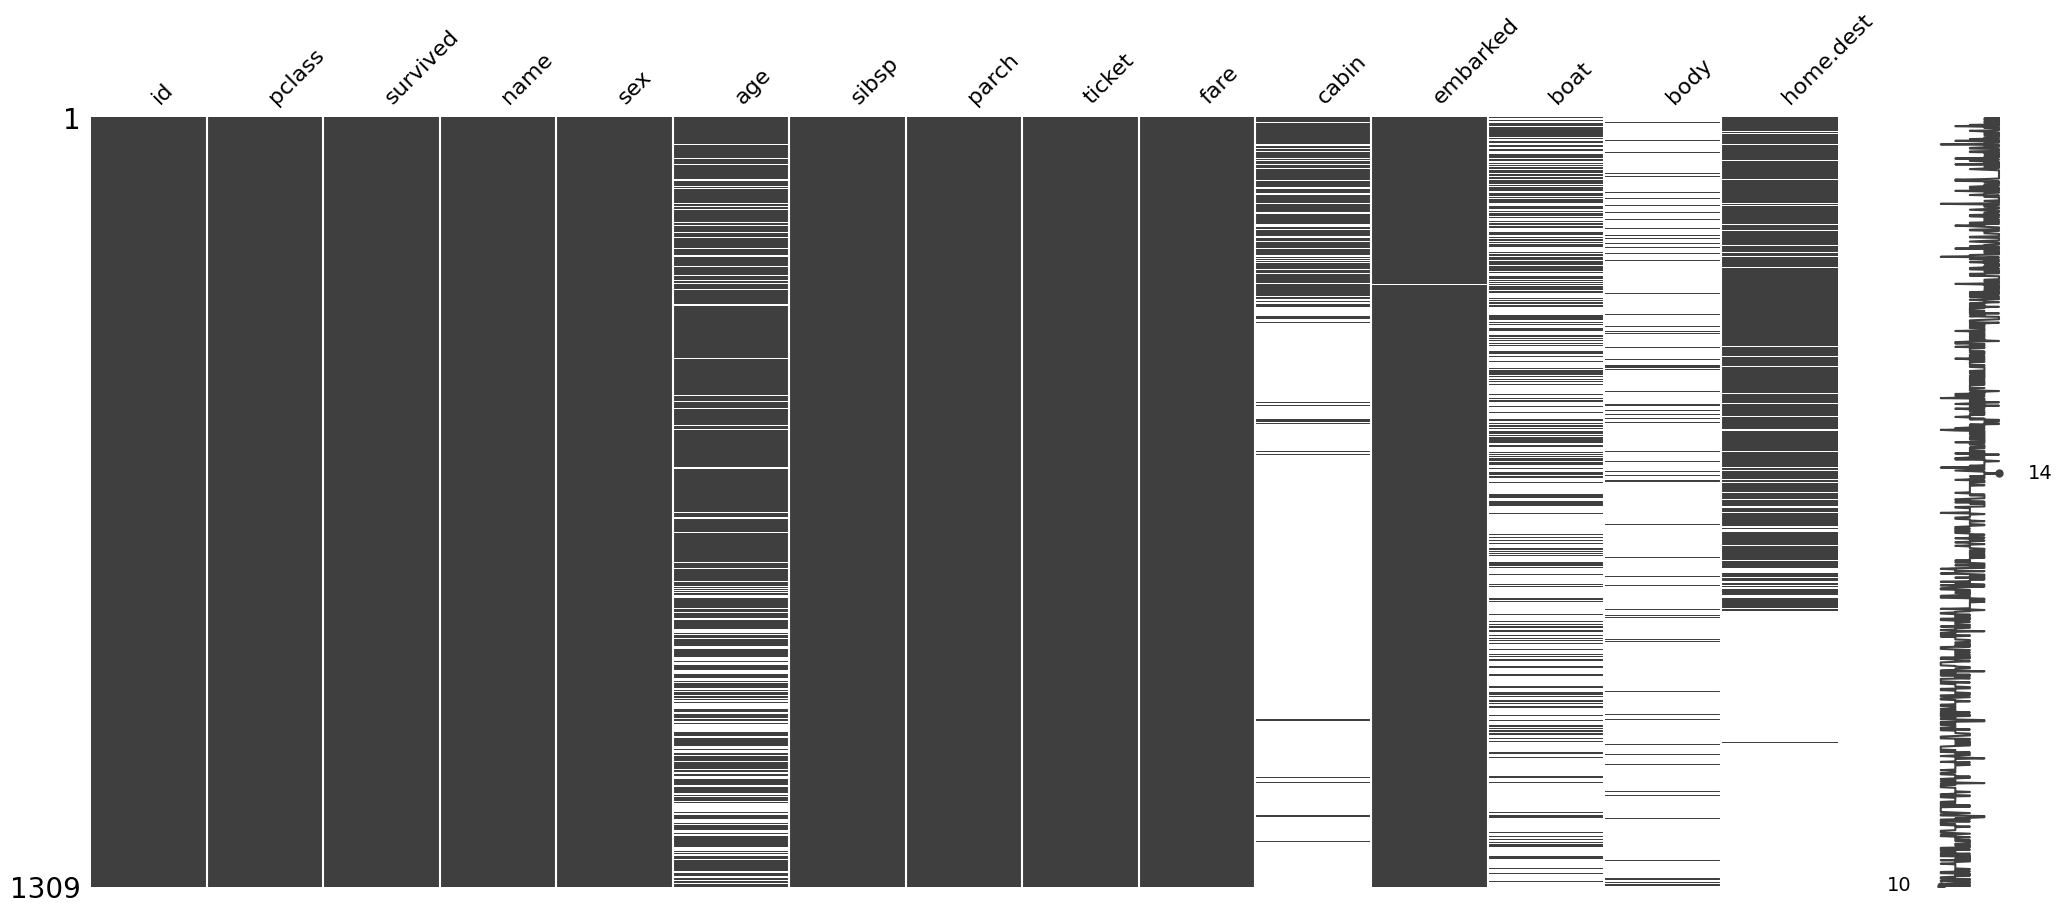

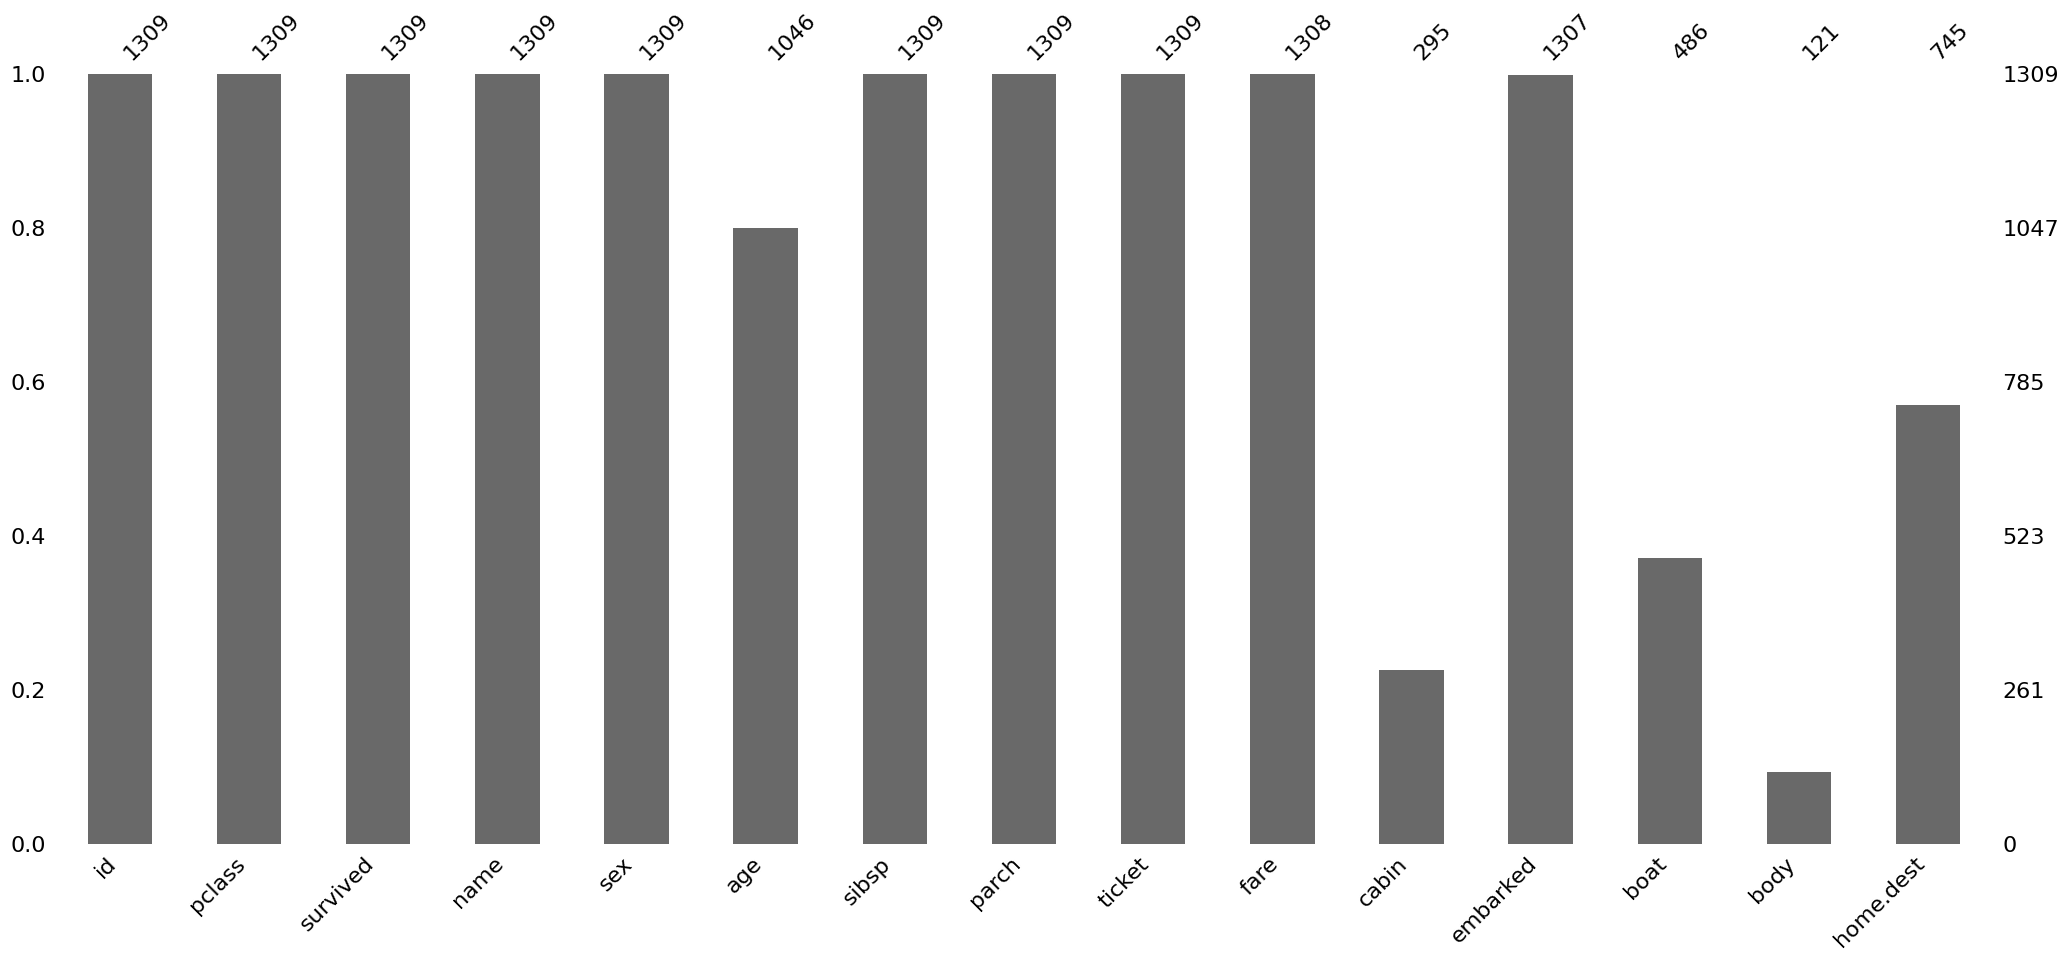

In [3]:
# Visual matrix of missing values
msno.matrix(data)
plt.show()

# Bar chart of missing values
msno.bar(data)
plt.show()

 Deeling with column cabin (Finding a way to salvage the available information)

/var/folders/gt/zql8qzpj6cj8n0_p_zjc053m0000gp/T/ipykernel_1450/2965354133.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data[data['pclass'] == passenger_class], x='Deck', order=data['Deck'].value_counts().index, palette='muted')
/var/folders/gt/zql8qzpj6cj8n0_p_zjc053m0000gp/T/ipykernel_1450/2965354133.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data[data['pclass'] == passenger_class], x='Deck', order=data['Deck'].value_counts().index, palette='muted')
/var/folders/gt/zql8qzpj6cj8n0_p_zjc053m0000gp/T/ipykernel_1450/2965354133.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable

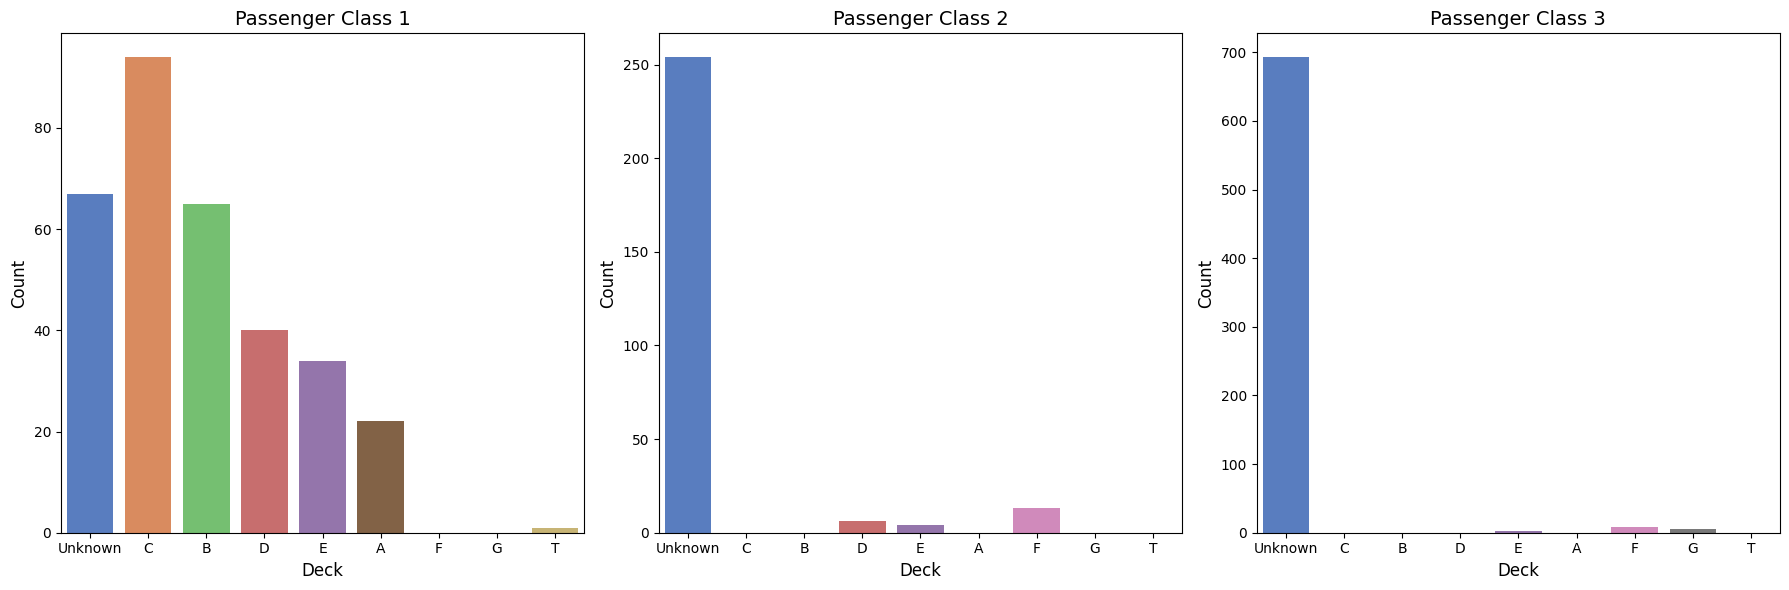

In [4]:
# Extract the first letter of the 'Cabin' column to get the deck
data['Deck'] = data['cabin'].str[0]

# Replace NaN values in 'Deck' with 'Unknown'
data['Deck'].fillna('Unknown', inplace=True)

# Create a list of passenger classes
classes = [1, 2, 3]

# Initialize the plot
plt.figure(figsize=(18, 6))

# Plot for each class
for i, passenger_class in enumerate(classes, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=data[data['pclass'] == passenger_class], x='Deck', order=data['Deck'].value_counts().index, palette='muted')
    plt.title(f'Passenger Class {passenger_class}', fontsize=14)
    plt.xlabel('Deck', fontsize=12)
    plt.ylabel('Count', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [5]:
data.head()

,id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Deck
0,1,1,1,"Allen,Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis,MO",B
1,2,1,1,"Allison,Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,NaN,"Montreal,PQ / Chesterville,ON",C
2,3,1,0,"Allison,Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal,PQ / Chesterville,ON",C
3,4,1,0,"Allison,Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,NaN,135,"Montreal,PQ / Chesterville,ON",C
4,5,1,0,"Allison,Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal,PQ / Chesterville,ON",C


In [6]:
# drop column cabin
data.drop('cabin', axis=1, inplace=True)

Based on historical sources we made the hypothesis of dividing the unknown location of second class passengers on deck C D and E respectively 5%, 30% and 65%. For third class passengers the hypothesis is to divide unknown location between deck E, F and G as follows: 10% deck E, 40% deck F and 50% deck G.


Sources: 

- "Titanic: The Ship Magnificent" by Bruce Beveridge and Steve Hall

- "Titanic: A Night Remembered" by Stephanie Barczewski

- "Titanic: The Official Story" by the British National Archives

- Encyclopedia Titanica



In [7]:
# Filter the dataset to only include second-class passengers
second_class_df = data[data['pclass'] == 2]

# Calculate the number of 'Unknown' values in the 'Deck' column for second-class passengers
unknown_count = second_class_df[second_class_df['Deck'] == 'Unknown'].shape[0]

# Calculate the allocation for each deck based on the percentage estimates
c_deck_allocation = int(0.05 * unknown_count)
d_deck_allocation = int(0.30 * unknown_count)
e_deck_allocation = unknown_count - c_deck_allocation - d_deck_allocation  # Remaining goes to E Deck

# Get the indices of the 'Unknown' deck values
unknown_indices = second_class_df[second_class_df['Deck'] == 'Unknown'].index

# Assign the deck values based on the calculated allocations
data.loc[unknown_indices[:c_deck_allocation], 'Deck'] = 'C'
data.loc[unknown_indices[c_deck_allocation:c_deck_allocation + d_deck_allocation], 'Deck'] = 'D'
data.loc[unknown_indices[c_deck_allocation + d_deck_allocation:], 'Deck'] = 'E'

In [8]:
# Filter the dataset to only include third-class passengers
third_class_df = data[data['pclass'] == 3]

# Calculate the number of 'Unknown' values in the 'Deck' column for third-class passengers
unknown_count = third_class_df[third_class_df['Deck'] == 'Unknown'].shape[0]

# Calculate the allocation for each deck based on the percentage estimates
e_deck_allocation = int(0.10 * unknown_count)
f_deck_allocation = int(0.40 * unknown_count)
g_deck_allocation = unknown_count - e_deck_allocation - f_deck_allocation  # Remaining goes to G Deck

# Get the indices of the 'Unknown' deck values
unknown_indices = third_class_df[third_class_df['Deck'] == 'Unknown'].index

# Assign the deck values based on the calculated allocations
data.loc[unknown_indices[:e_deck_allocation], 'Deck'] = 'E'
data.loc[unknown_indices[e_deck_allocation:e_deck_allocation + f_deck_allocation], 'Deck'] = 'F'
data.loc[unknown_indices[e_deck_allocation + f_deck_allocation:], 'Deck'] = 'G'


/var/folders/gt/zql8qzpj6cj8n0_p_zjc053m0000gp/T/ipykernel_1450/1667296542.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data[data['pclass'] == passenger_class], x='Deck', order=data['Deck'].value_counts().index, palette='muted')
/var/folders/gt/zql8qzpj6cj8n0_p_zjc053m0000gp/T/ipykernel_1450/1667296542.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data[data['pclass'] == passenger_class], x='Deck', order=data['Deck'].value_counts().index, palette='muted')
/var/folders/gt/zql8qzpj6cj8n0_p_zjc053m0000gp/T/ipykernel_1450/1667296542.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to

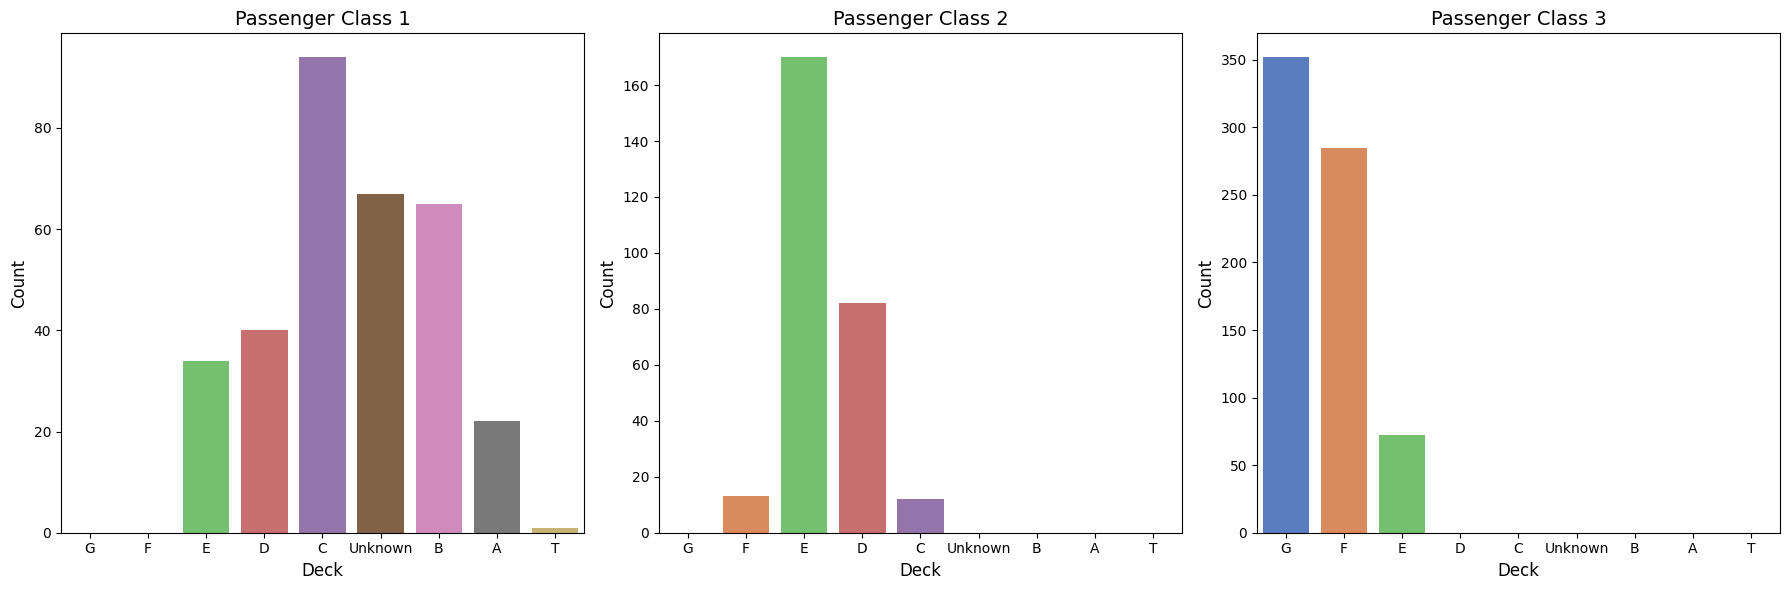

In [9]:
# Initialize the plot
plt.figure(figsize=(18, 6))

# Plot for each class
for i, passenger_class in enumerate(classes, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=data[data['pclass'] == passenger_class], x='Deck', order=data['Deck'].value_counts().index, palette='muted')
    plt.title(f'Passenger Class {passenger_class}', fontsize=14)
    plt.xlabel('Deck', fontsize=12)
    plt.ylabel('Count', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Deeling wiht column Name: trying to extract socio-economical information from the available titles

In [10]:
# Define a function to extract the title from the name
def extract_title(name):
    title_search = re.search(r',\s*([^.]*)\.', name)
    if title_search:
        return title_search.group(1).strip()
    return "Unknown"

# Extract titles from the "Name" column
data['Title'] = data['name'].apply(extract_title)

# Print unique titles to debug
unique_titles = data['Title'].unique()
print("Unique titles in the dataset:", unique_titles)

# Define a mapping of titles to social status
title_mapping = {
    'Mr': 'Commoner', 'Mrs': 'Commoner', 'Miss': 'Commoner', 'Master': 'Commoner',
    'Don': 'Nobility', 'Rev': 'Clergy', 'Dr': 'Professional', 'Mme': 'Commoner',
    'Ms': 'Commoner', 'Major': 'Military', 'Lady': 'Nobility', 'Sir': 'Nobility',
    'Mlle': 'Commoner', 'Col': 'Military', 'Capt': 'Military', 'Countess': 'Nobility',
    'Jonkheer': 'Nobility', 'Dona': 'Nobility'
}

# Map the titles to social status
data['SocialStatus'] = data['Title'].map(title_mapping)

# Fill NaN values with 'Unknown' for SocialStatus
data['SocialStatus'].fillna('Unknown', inplace=True)

# Display the first few rows to verify the new column
print(data[['name', 'Title', 'SocialStatus']].head(20))

Unique titles in the dataset: ['Miss' 'Master' 'Mr' 'Mrs' 'Col' 'Mme' 'Dr' 'Major' 'Capt' 'Lady' 'Sir'
 'Mlle' 'Dona' 'Jonkheer' 'the Countess' 'Don' 'Rev' 'Ms']
                                                name   Title SocialStatus
0                       Allen,Miss. Elisabeth Walton    Miss     Commoner
1                      Allison,Master. Hudson Trevor  Master     Commoner
2                        Allison,Miss. Helen Loraine    Miss     Commoner
3                Allison,Mr. Hudson Joshua Creighton      Mr     Commoner
4     Allison,Mrs. Hudson J C (Bessie Waldo Daniels)     Mrs     Commoner
5                                 Anderson,Mr. Harry      Mr     Commoner
6                   Andrews,Miss. Kornelia Theodosia    Miss     Commoner
7                              Andrews,Mr. Thomas Jr      Mr     Commoner
8       Appleton,Mrs. Edward Dale (Charlotte Lamson)     Mrs     Commoner
9                             Artagaveytia,Mr. Ramon      Mr     Commoner
10                      

In [11]:
# drop column name 
data.drop('name', axis=1, inplace=True)

In [12]:
data.head()

,id,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,Deck,Title,SocialStatus
0,1,1,1,female,29,0,0,24160,211.3375,S,2,NaN,"St Louis,MO",B,Miss,Commoner
1,2,1,1,male,0.9167,1,2,113781,151.55,S,11,NaN,"Montreal,PQ / Chesterville,ON",C,Master,Commoner
2,3,1,0,female,2,1,2,113781,151.55,S,NaN,NaN,"Montreal,PQ / Chesterville,ON",C,Miss,Commoner
3,4,1,0,male,30,1,2,113781,151.55,S,NaN,135,"Montreal,PQ / Chesterville,ON",C,Mr,Commoner
4,5,1,0,female,25,1,2,113781,151.55,S,NaN,NaN,"Montreal,PQ / Chesterville,ON",C,Mrs,Commoner


Dealing with body (it is a subtitute of the response, it makes no sense keeping it in)

In [13]:
# drop column body 
data.drop('body', axis=1, inplace=True)
data.head()

,id,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,boat,home.dest,Deck,Title,SocialStatus
0,1,1,1,female,29,0,0,24160,211.3375,S,2,"St Louis,MO",B,Miss,Commoner
1,2,1,1,male,0.9167,1,2,113781,151.55,S,11,"Montreal,PQ / Chesterville,ON",C,Master,Commoner
2,3,1,0,female,2,1,2,113781,151.55,S,NaN,"Montreal,PQ / Chesterville,ON",C,Miss,Commoner
3,4,1,0,male,30,1,2,113781,151.55,S,NaN,"Montreal,PQ / Chesterville,ON",C,Mr,Commoner
4,5,1,0,female,25,1,2,113781,151.55,S,NaN,"Montreal,PQ / Chesterville,ON",C,Mrs,Commoner


Dealing with home.dest (non relevance of the column)

In [14]:
# drop column body 
data.drop('home.dest', axis=1, inplace=True)
data.head()

,id,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,boat,Deck,Title,SocialStatus
0,1,1,1,female,29,0,0,24160,211.3375,S,2,B,Miss,Commoner
1,2,1,1,male,0.9167,1,2,113781,151.55,S,11,C,Master,Commoner
2,3,1,0,female,2,1,2,113781,151.55,S,NaN,C,Miss,Commoner
3,4,1,0,male,30,1,2,113781,151.55,S,NaN,C,Mr,Commoner
4,5,1,0,female,25,1,2,113781,151.55,S,NaN,C,Mrs,Commoner


Dealing with id (non relevant)

In [15]:
# drop column body 
data.drop('id', axis=1, inplace=True)
data.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,boat,Deck,Title,SocialStatus
0,1,1,female,29,0,0,24160,211.3375,S,2,B,Miss,Commoner
1,1,1,male,0.9167,1,2,113781,151.55,S,11,C,Master,Commoner
2,1,0,female,2,1,2,113781,151.55,S,NaN,C,Miss,Commoner
3,1,0,male,30,1,2,113781,151.55,S,NaN,C,Mr,Commoner
4,1,0,female,25,1,2,113781,151.55,S,NaN,C,Mrs,Commoner


Dealing with boat (it is a substitute of the response, it makes no sense keeping it in)

In [16]:
# drop column body 
data.drop('boat', axis=1, inplace=True)
data.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,Deck,Title,SocialStatus
0,1,1,female,29,0,0,24160,211.3375,S,B,Miss,Commoner
1,1,1,male,0.9167,1,2,113781,151.55,S,C,Master,Commoner
2,1,0,female,2,1,2,113781,151.55,S,C,Miss,Commoner
3,1,0,male,30,1,2,113781,151.55,S,C,Mr,Commoner
4,1,0,female,25,1,2,113781,151.55,S,C,Mrs,Commoner


Dealing with ticket (non relevant)

In [17]:
# drop column body 
data.drop('ticket', axis=1, inplace=True)
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,Deck,Title,SocialStatus
0,1,1,female,29,0,0,211.3375,S,B,Miss,Commoner
1,1,1,male,0.9167,1,2,151.55,S,C,Master,Commoner
2,1,0,female,2,1,2,151.55,S,C,Miss,Commoner
3,1,0,male,30,1,2,151.55,S,C,Mr,Commoner
4,1,0,female,25,1,2,151.55,S,C,Mrs,Commoner


Apparently deck T is an error of data gathering since there is no historical source that refers to a deck T

In [18]:
# Drop rows with Deck == 'T'
data = data[data['Deck'] != 'T']

Categorization of variables

In [19]:
# Replace 'female' with 0 and 'male' with 1 in the 'sex' column
data['sex'] = data['sex'].replace({'female': 0, 'male': 1})

In [20]:
# Replace 'C' with 0, 'Q' with 1, and 'S' with 2 in the 'embarked' column
data['embarked'] = data['embarked'].replace({'C': 0, 'Q': 1, 'S': 2})

In [21]:
# Replace 'A' with 0, 'B' with 1, 'C' with 2, 'D' with 3, 'E' with 4, 'F' with 5, 'G' with 6, 'T' with 7, and 'Unknown' with Nan
data['Deck'] = data['Deck'].replace({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'Unknown': np.nan})

In [22]:
# Replace Title: 'Miss' with 0, 'Mr' with 1, 'Mrs' with 2, 'Master' with 3, 'Dr' with 4, 'Rev' with 5, 'Col' with 6, 'Mlle' with 7, 'Major' with 8, 'Capt' with 9, 'Sir' with 10, 'Jonkheer' with 11, 'Lady' with 12, 'Don' with 13, 'Mme' with 14, 'Countess' with 15, 'Ms' with 16, 'Dona' with 17
data['Title'] = data['Title'].replace({'Miss': 0, 'Mr': 1, 'Mrs': 2, 'Master': 3, 'Dr': 4, 'Rev': 5, 'Col': 6, 'Mlle': 7, 'Major': 8, 'Capt': 9, 'Sir': 10, 'Jonkheer': 11, 'Lady': 12, 'Don': 13, 'Mme': 14, 'the Countess': 15, 'Ms': 16, 'Dona': 17})

In [23]:
# Replace SocialStatus: 'Commoner' with 0, 'Nobility' with 1, 'Clergy' with 2, 'Professional' with 3, 'Military' with 4, 'Unknown' with Nan
data['SocialStatus'] = data['SocialStatus'].replace({'Commoner': 0, 'Nobility': 1, 'Clergy': 2, 'Professional': 3, 'Military': 4, 'Unknown': np.nan})

Check final results before imputation

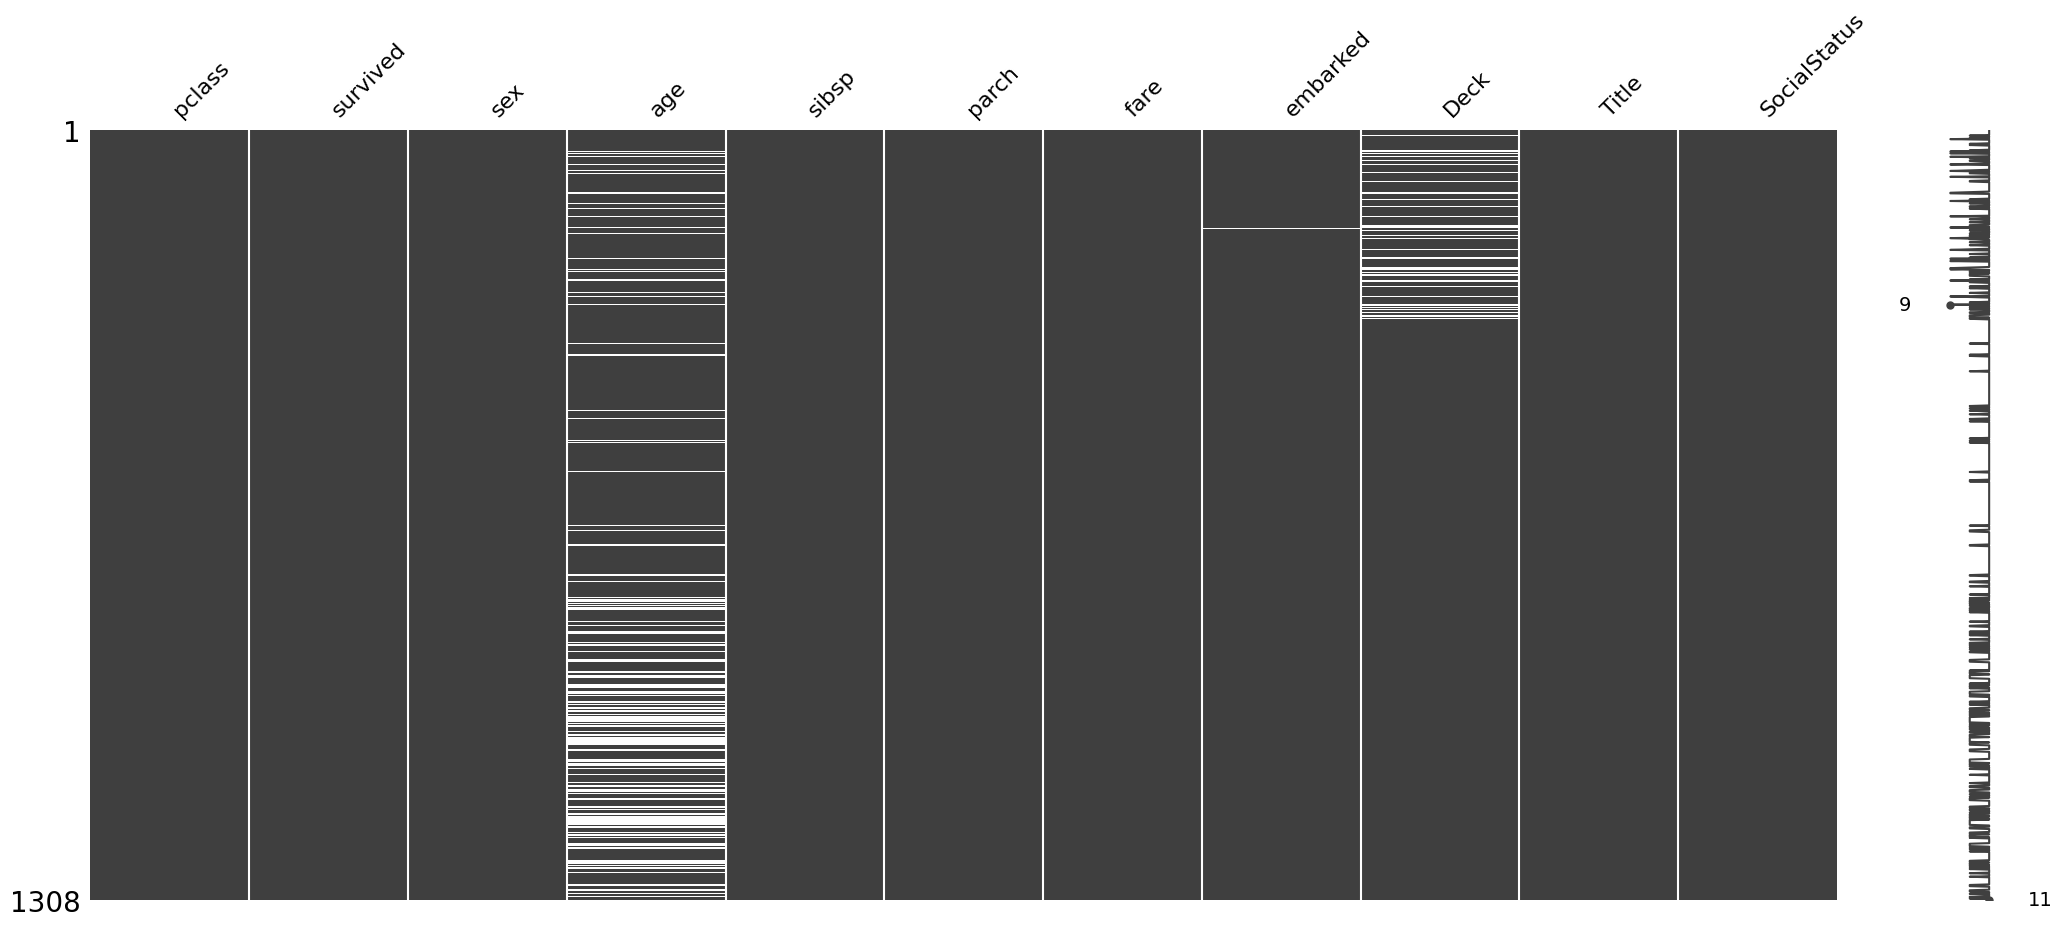

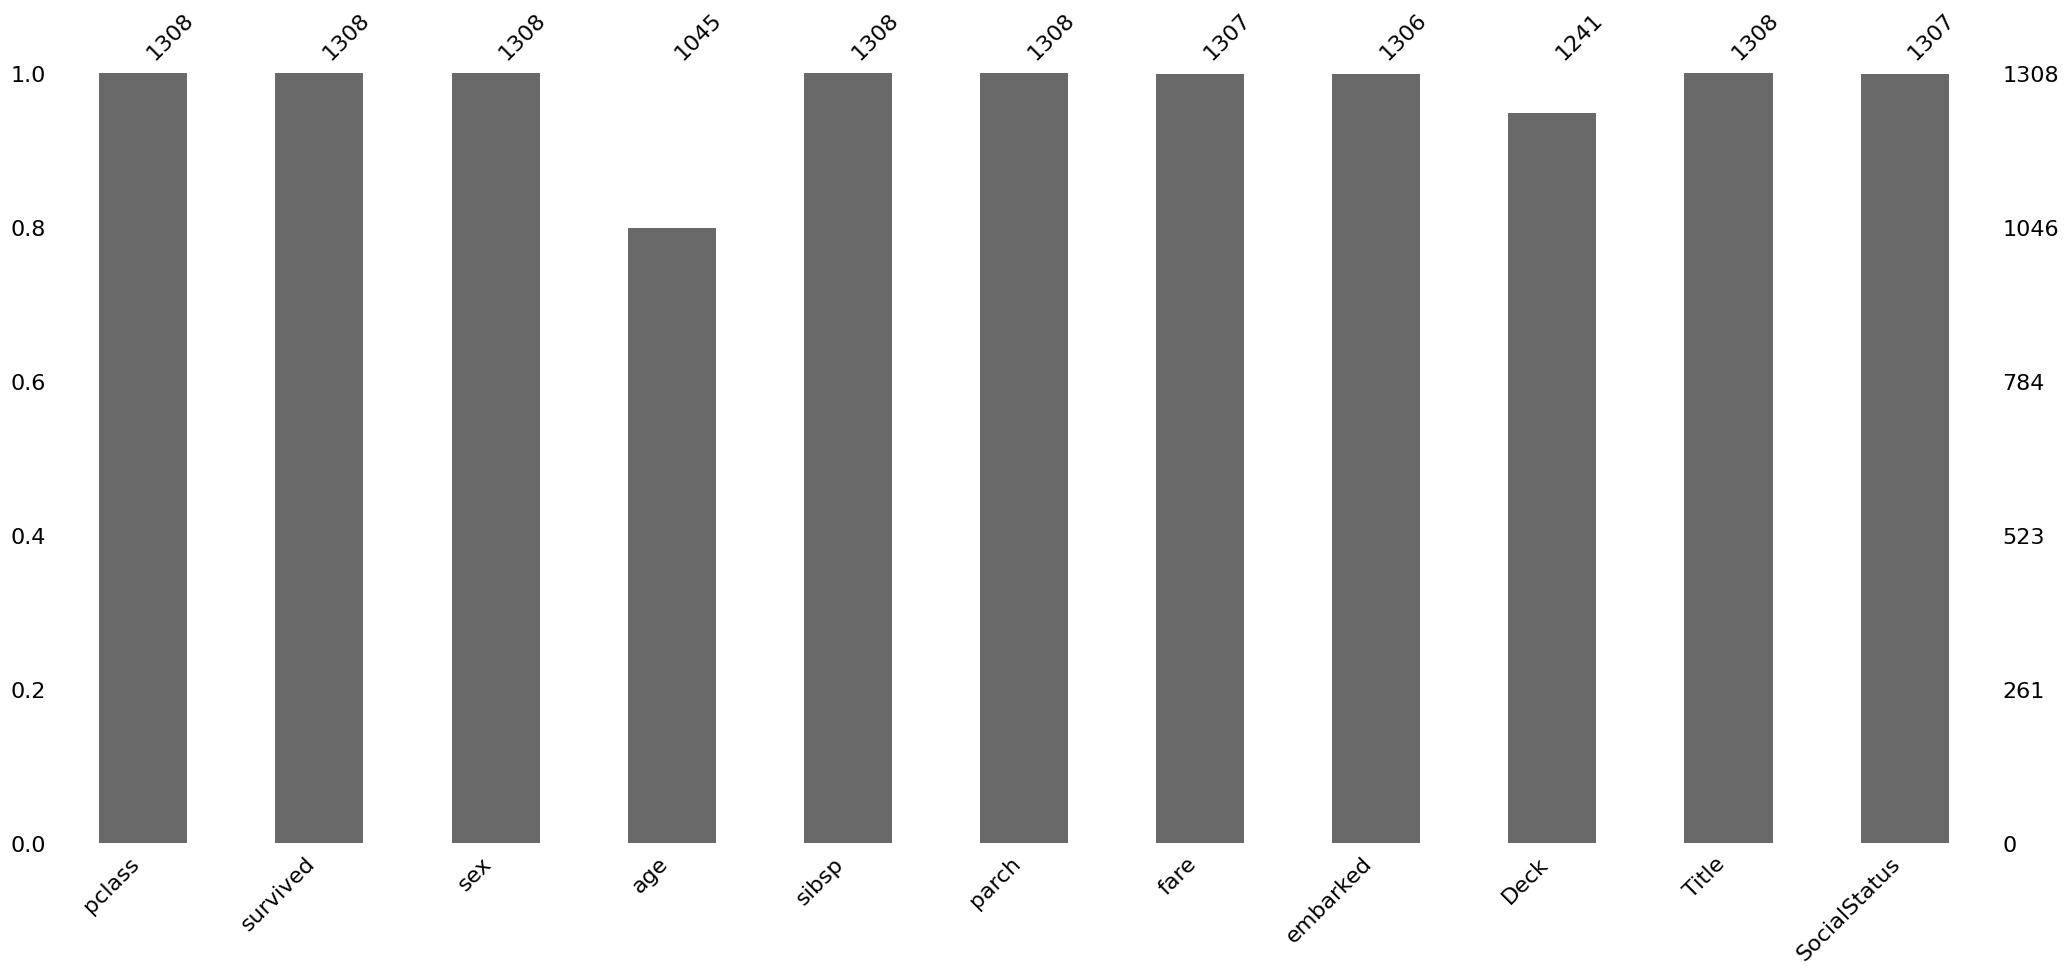

In [24]:
# Visual matrix of missing values
msno.matrix(data)
plt.show()

# Bar chart of missing values
msno.bar(data)
plt.show()

Starting imputation process

In [25]:
# make age and fare float64
data['age'] = data['age'].astype('float64')
data['fare'] = data['fare'].astype('float64')

In [26]:
# Convert all variables except specified floats to nullable integers
float_vars = ['age','fare']
for column in data.columns:
    if column not in float_vars:
        data[column] = data[column].astype('Int64')  # Note the capital 'I' which is different from 'int64'

In [27]:
int_columns = data.select_dtypes(include=['Int64']).columns
float_columns = data.select_dtypes(include=['float64']).columns

In [28]:
# Shuffle the data 
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

Random Forest Imputation

In [29]:
def impute_missing_values(df, column, model_type):
    # Split the data into sets with and without missing values
    train = df[df[column].notna()]
    test = df[df[column].isna()]

    # Define features and target
    X_train = train.drop(columns=[column])
    y_train = train[column]
    X_test = test.drop(columns=[column])

    # Initialize and train the model
    if model_type == 'classifier':
        model = RandomForestClassifier(n_estimators=100, random_state=42)
    else:
        model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    model.fit(X_train, y_train)

    # Predict and impute missing values
    if len(X_test) > 0:
        df.loc[df[column].isna(), column] = model.predict(X_test)

# Applying imputation for each column
for column in int_columns:
    impute_missing_values(data, column, 'classifier')

for column in float_columns:
    impute_missing_values(data, column, 'regressor')

In [30]:
# Count nan
data.isna().sum()

pclass          0
survived        0
sex             0
age             0
sibsp           0
parch           0
fare            0
embarked        0
Deck            0
Title           0
SocialStatus    0
dtype: int64

In [31]:
data.head(10)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,Deck,Title,SocialStatus
0,3,0,0,36.023099,0,0,8.0500,2,6,2,0
1,3,1,1,20.000000,1,1,15.7417,0,6,1,0
2,3,0,0,21.000000,0,0,8.6625,2,5,0,0
3,3,0,1,19.000000,0,0,8.1583,2,5,1,0
4,3,0,1,31.000000,0,0,7.7500,1,5,1,0
5,1,0,1,41.670000,0,0,50.0000,2,0,1,0
6,3,0,1,25.000000,0,0,7.9250,2,6,1,0
7,3,0,1,24.524167,0,0,7.2250,0,5,1,0
8,3,0,0,17.897667,8,2,69.5500,2,6,0,0
9,1,1,0,36.000000,0,0,262.3750,0,1,0,0


Creation of dummies for categorical variables 


In [32]:
# create a vectors for dummy variables associated to each categorical F3_Highest_Level_of_Education
data['embarked_0'] = np.where(data['embarked']==0, 1, 0)
data['embarked_1'] = np.where(data['embarked']==1, 1, 0)
data['embarked_2'] = np.where(data['embarked']==2, 1, 0)

# create a vectors for dummy variables associated to each categorical F3_Highest_Level_of_Education
data['pclass_0'] = np.where(data['pclass']==1, 1, 0)
data['pclass_1'] = np.where(data['pclass']==2, 1, 0)
data['pclass_2'] = np.where(data['pclass']==3, 1, 0)

# create a vectors for dummy variables associated to each categorical F3_Highest_Level_of_Education
data['female'] = np.where(data['sex']==0, 1, 0)
data['male'] = np.where(data['sex']==1, 1, 0)

# create a vectors for dummy variables associated to each categorical Deck
data['deck_0'] = np.where(data['Deck']==0, 1, 0)
data['deck_1'] = np.where(data['Deck']==1, 1, 0)
data['deck_2'] = np.where(data['Deck']==2, 1, 0)
data['deck_3'] = np.where(data['Deck']==3, 1, 0)
data['deck_4'] = np.where(data['Deck']==4, 1, 0)
data['deck_5'] = np.where(data['Deck']==5, 1, 0)
data['deck_6'] = np.where(data['Deck']==6, 1, 0)

# create a vectors for dummy variables associated to each categorical Title
data['title_0'] = np.where(data['Title']==0, 1, 0)
data['title_1'] = np.where(data['Title']==1, 1, 0)
data['title_2'] = np.where(data['Title']==2, 1, 0)
data['title_3'] = np.where(data['Title']==3, 1, 0)
data['title_4'] = np.where(data['Title']==4, 1, 0)
data['title_5'] = np.where(data['Title']==5, 1, 0)
data['title_6'] = np.where(data['Title']==6, 1, 0)
data['title_7'] = np.where(data['Title']==7, 1, 0)
data['title_8'] = np.where(data['Title']==8, 1, 0)
data['title_9'] = np.where(data['Title']==9, 1, 0)
data['title_10'] = np.where(data['Title']==10, 1, 0)
data['title_11'] = np.where(data['Title']==11, 1, 0)
data['title_12'] = np.where(data['Title']==12, 1, 0)
data['title_13'] = np.where(data['Title']==13, 1, 0)
data['title_14'] = np.where(data['Title']==14, 1, 0)
data['title_15'] = np.where(data['Title']==15, 1, 0)
data['title_16'] = np.where(data['Title']==16, 1, 0)
data['title_17'] = np.where(data['Title']==17, 1, 0)

# create a vectors for dummy variables associated to each categorical SocialStatus
data['socialstatus_0'] = np.where(data['SocialStatus']==0, 1, 0)
data['socialstatus_1'] = np.where(data['SocialStatus']==1, 1, 0)
data['socialstatus_2'] = np.where(data['SocialStatus']==2, 1, 0)
data['socialstatus_3'] = np.where(data['SocialStatus']==3, 1, 0)
data['socialstatus_4'] = np.where(data['SocialStatus']==4, 1, 0)

In [33]:
# Drop multiple columns
columns_to_drop = ['embarked','sex','pclass', 'Deck', 'Title', 'SocialStatus']
data.drop(columns=columns_to_drop, inplace=True)

In [34]:
data.head(10)

,survived,age,sibsp,parch,fare,embarked_0,embarked_1,embarked_2,pclass_0,pclass_1,...,title_13,title_14,title_15,title_16,title_17,socialstatus_0,socialstatus_1,socialstatus_2,socialstatus_3,socialstatus_4
0,0,36.023099,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,20.000000,1,1,15.7417,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,21.000000,0,0,8.6625,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,19.000000,0,0,8.1583,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,31.000000,0,0,7.7500,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,41.670000,0,0,50.0000,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
6,0,25.000000,0,0,7.9250,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
7,0,24.524167,0,0,7.2250,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,0,17.897667,8,2,69.5500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
9,1,36.000000,0,0,262.3750,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [35]:
data.dtypes

survived            Int64
age               float64
sibsp               Int64
parch               Int64
fare              float64
embarked_0          int64
embarked_1          int64
embarked_2          int64
pclass_0            int64
pclass_1            int64
pclass_2            int64
female              int64
male                int64
deck_0              int64
deck_1              int64
deck_2              int64
deck_3              int64
deck_4              int64
deck_5              int64
deck_6              int64
title_0             int64
title_1             int64
title_2             int64
title_3             int64
title_4             int64
title_5             int64
title_6             int64
title_7             int64
title_8             int64
title_9             int64
title_10            int64
title_11            int64
title_12            int64
title_13            int64
title_14            int64
title_15            int64
title_16            int64
title_17            int64
socialstatus

Standardization

In [36]:
# Standardize only float64 variables
scaler = StandardScaler()
data[data.select_dtypes(include=['float64']).columns] = scaler.fit_transform(data.select_dtypes(include=['float64']))

data.head(10)

,survived,age,sibsp,parch,fare,embarked_0,embarked_1,embarked_2,pclass_0,pclass_1,...,title_13,title_14,title_15,title_16,title_17,socialstatus_0,socialstatus_1,socialstatus_2,socialstatus_3,socialstatus_4
0,0,0.453946,0,0,-0.487466,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,-0.727492,1,1,-0.338817,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,-0.653758,0,0,-0.475629,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,-0.801225,0,0,-0.485373,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0.083576,0,0,-0.493264,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0.870312,0,0,0.323255,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
6,0,-0.358825,0,0,-0.489882,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
7,0,-0.393909,0,0,-0.503410,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,0,-0.882504,8,2,0.701076,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
9,1,0.452243,0,0,4.427591,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [37]:
# Split the data into X and y
y = data['survived']
X = data.drop(columns=['survived'])

Oversampling

In [38]:
# Categorical_features should be a boolean mask or column indices that specify which features are categorical
categorical_features = [True if dtype.name == 'Int64'else False for dtype in X.dtypes]
 
smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_resampled, y_resampled = smotenc.fit_resample(X, y)
 
# Step 1: Convert X_resampled to a DataFrame if it isn't one already
if not isinstance(X_resampled, pd.DataFrame):
    X_resampled = pd.DataFrame(X_resampled, columns=X.columns) 
 
# Step 2: Add y_resampled to this DataFrame
X_resampled['target'] = y_resampled

In [39]:
# Unique values of y and frequency
X_resampled['target'].value_counts()


0    808
1    808
Name: target, dtype: Int64

In [40]:
# Split the data into X and y
y = X_resampled['target']
X = X_resampled.drop(columns=['target'])

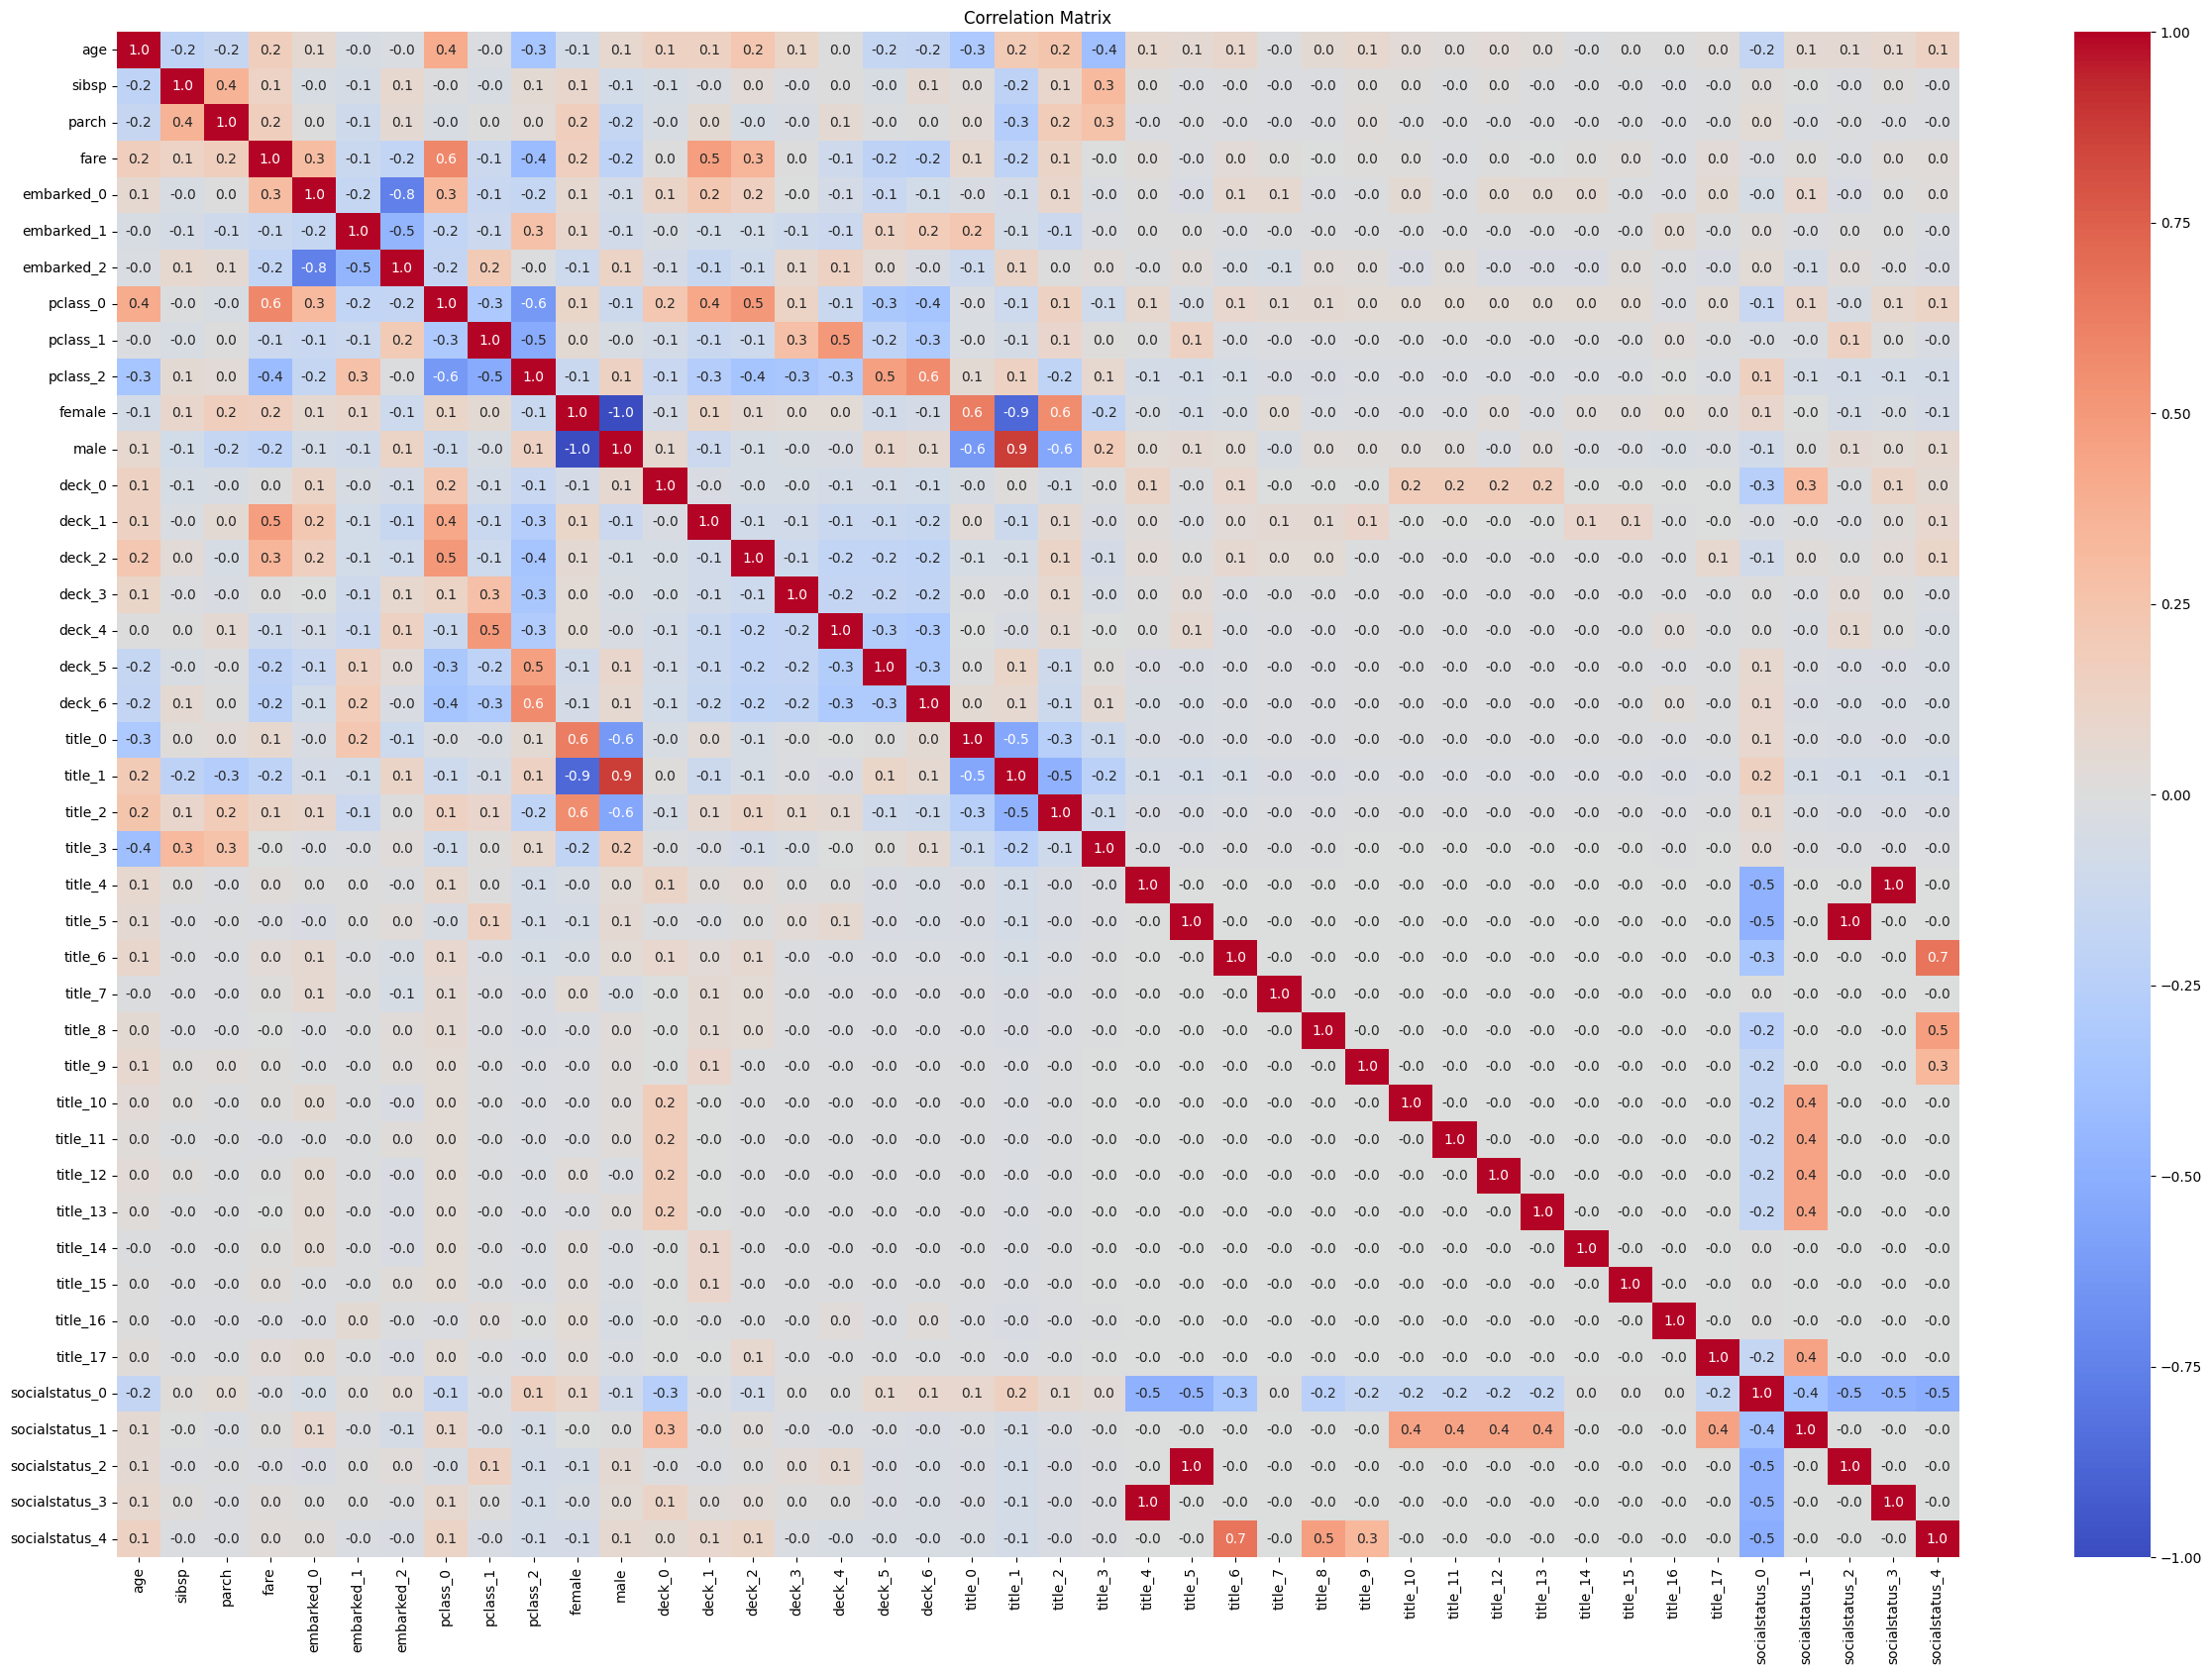

In [41]:
# Create a correlation matrix
corr = pd.DataFrame(X).corr()

# Display the correlation matrix
plt.figure(figsize=(30, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".1f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [42]:
# make X polynomial features with garde 3
poly = PolynomialFeatures(degree=3)
X = poly.fit_transform(X)

In [43]:
# Make X dataset
X = pd.DataFrame(X)

### RANDOM FOREST (bayesian optimziation)

In [44]:
# Define the function to optimize
def rf_eval(n_estimators, max_depth, min_samples_split, min_samples_leaf):

    # Ensure the parameters passed by the optimizer are integers
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    min_samples_split = int(min_samples_split)
    min_samples_leaf = int(min_samples_leaf)

    # Train the model
    model = RandomForestClassifier(n_estimators=n_estimators,
                                   max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf,
                                   random_state=42)
    
    # Define Stratified K-Fold cross-validator
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation
    accuracies = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    return np.mean(accuracies)

# Hyperparameter bounds
pbounds = {
    'n_estimators': (50, 200),
    'max_depth': (1, 50),
    'min_samples_split': (2, 15),
    'min_samples_leaf': (1, 5),
}

# Bayesian Optimization
optimizer = BayesianOptimization(
    f=rf_eval,
    pbounds=pbounds,
    random_state=42,
) 

optimizer.maximize(init_points=2, n_iter=10)

# Retrieve the best parameters
best_params = optimizer.max['params']
print("Best Parameters:", best_params)

|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
| 1         | 0.841     | 19.35     | 4.803     | 11.52     | 139.8     |
| 2         | 0.8267    | 8.645     | 1.624     | 2.755     | 179.9     |
| 3         | 0.8403    | 19.95     | 4.538     | 13.1      | 139.8     |
| 4         | 0.8057    | 6.661     | 4.353     | 2.928     | 120.8     |
| 5         | 0.8323    | 28.15     | 5.0       | 4.662     | 151.5     |
| 6         | 0.8187    | 8.947     | 5.0       | 14.28     | 151.3     |
| 7         | 0.841     | 29.67     | 4.421     | 7.414     | 136.1     |
| 8         | 0.8304    | 45.78     | 5.0       | 15.0      | 135.3     |
| 9         | 0.8496    | 40.96     | 1.239     | 2.421     | 119.1     |
| 10        | 0.8428    | 47.9      | 2.202     | 2.0       | 109.1     |
| 11        | 0.8441    | 37.04     | 1.0       | 13.65     | 113.0     |
| 12        | 0.8484    | 33.08     | 

In [45]:
# Train the best model using the best parameters
best_model = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    random_state=42
)
best_model.fit(X, y)

RandomForestClassifier(max_depth=40, n_estimators=119, random_state=42)

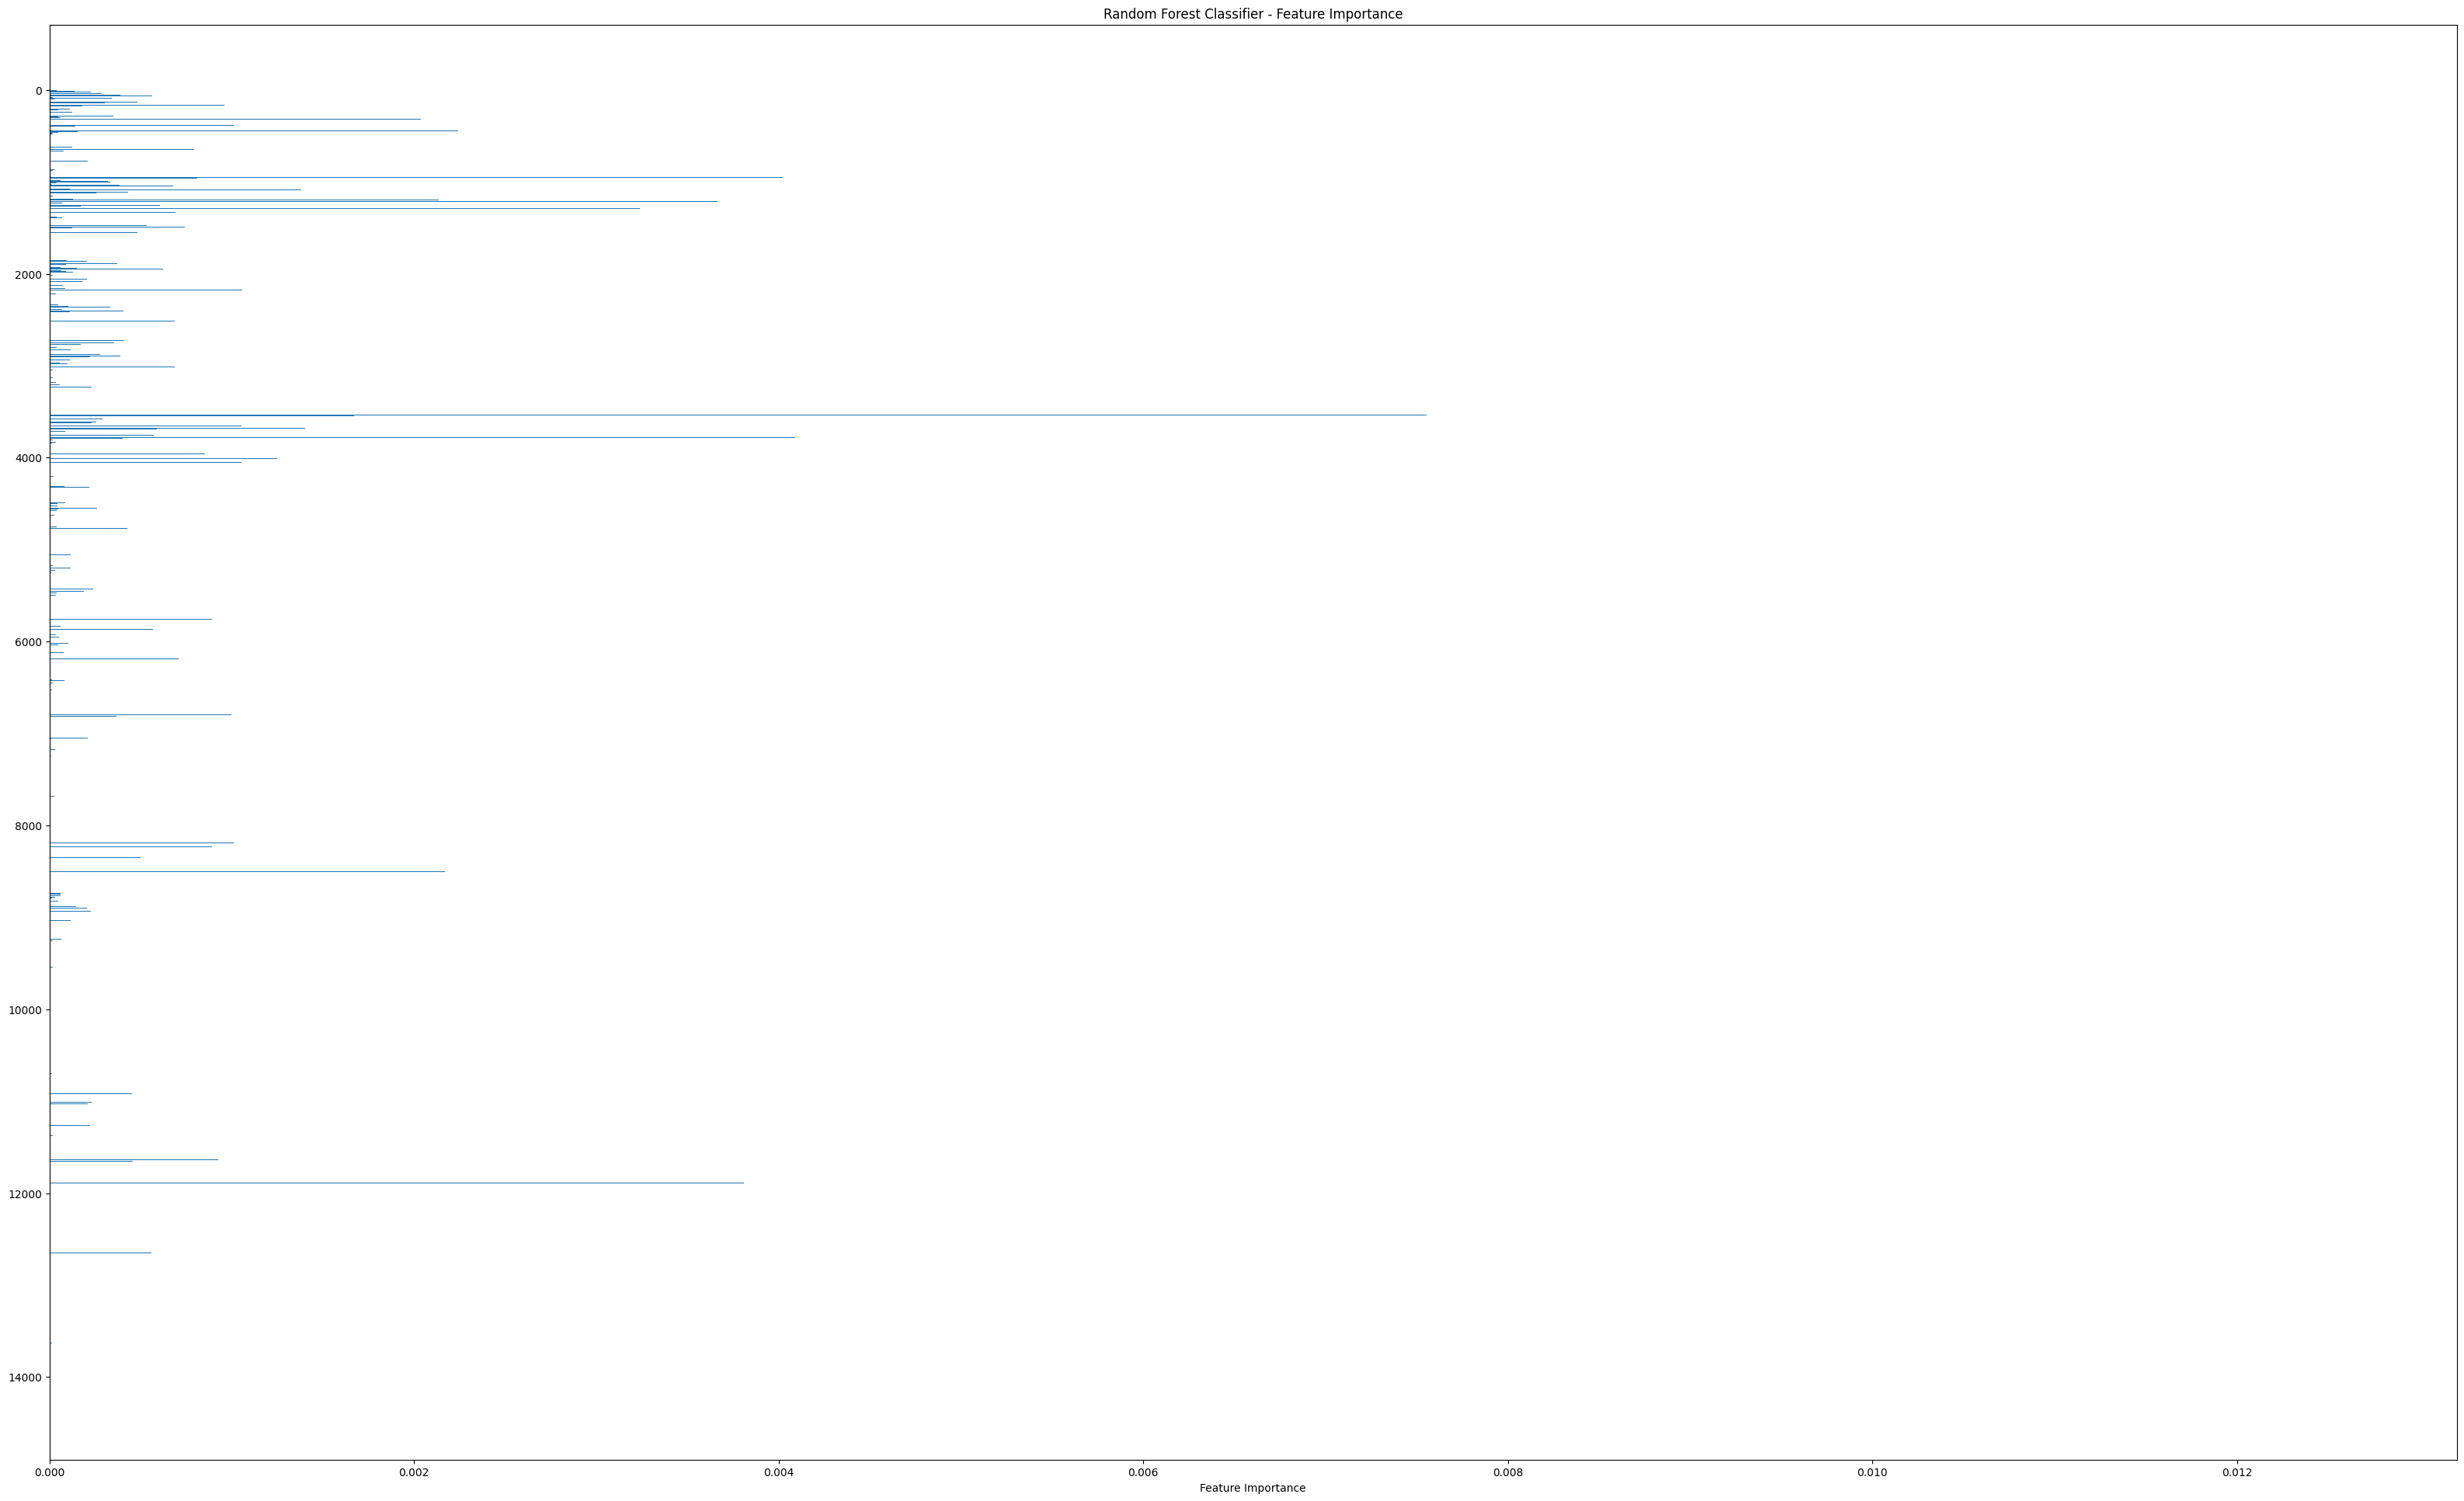

In [46]:
# Extract feature importances
feature_importances = best_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(40, 24))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Classifier - Feature Importance')
plt.gca().invert_yaxis()
plt.show()

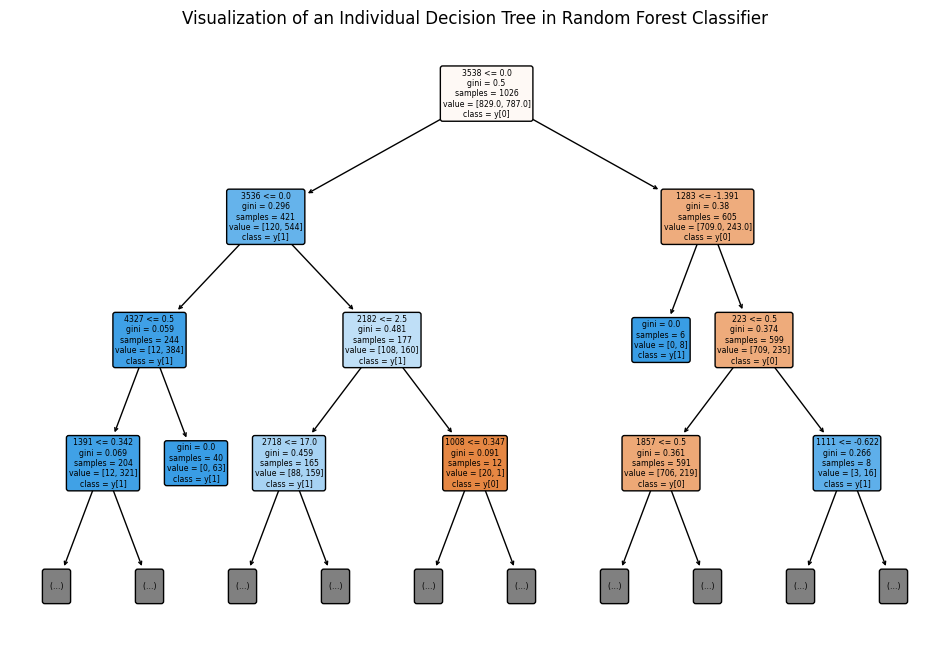

In [47]:
individual_tree = best_model.estimators_[0]  # Fetching the first tree

plt.figure(figsize=(12, 8))
plot_tree(individual_tree, feature_names=feature_names, class_names=True, filled=True, rounded=True, max_depth=3)
plt.title("Visualization of an Individual Decision Tree in Random Forest Classifier")
plt.show()